## Step 1: Gather Data (3 points)


About Dataset

https://www.kaggle.com/datasets/harshal19t/lastfm-dataset

Last.fm Limited is a music website founded in the United Kingdom in 2002. Using a music recommender system called "Audioscrobbler", Last.fm builds a detailed profile of each user's musical taste by recording details of the tracks the user listens to, either from Internet radio stations, or the user's computer or many portable music devices. This information is transferred ("scrobbled") to Last.fm's database either via the music player (including, among others, Spotify, Deezer, Tidal, MusicBee, SoundCloud, and Anghami) or via a plug-in installed into the user's music player. The data is then displayed on the user's profile page and compiled to create reference pages for individual artists.


The last.fm dataset consists of 166153 entries and 6 attributes. These attributes are:

Username: Consists of the name of the user.

Artist: Name of the artists that the user had heard.

Track: Consists of track/song name by that particular artist.

Album: Consists of names of the albums.

Date: Consists of the days ranging from January 1st to January 31st, 2021.

Time: Consists of the time of a particular day when the user had heard a particular track.


## Step 2: Identify an Unsupervised Learning Problem (6 points)

User Behavior Clustering

"Can we cluster users based on their listening activity to find patterns in music consumption behavior?"


Identifies user groups (e.g., casual listeners vs. heavy users).

Helps understand audience segmentation for music platforms.


## Step 3: Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)


In [49]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Last.fm_data.csv")

print("First few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First few rows:
   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166153 entries, 0 to 166152
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166

C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\2082764373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


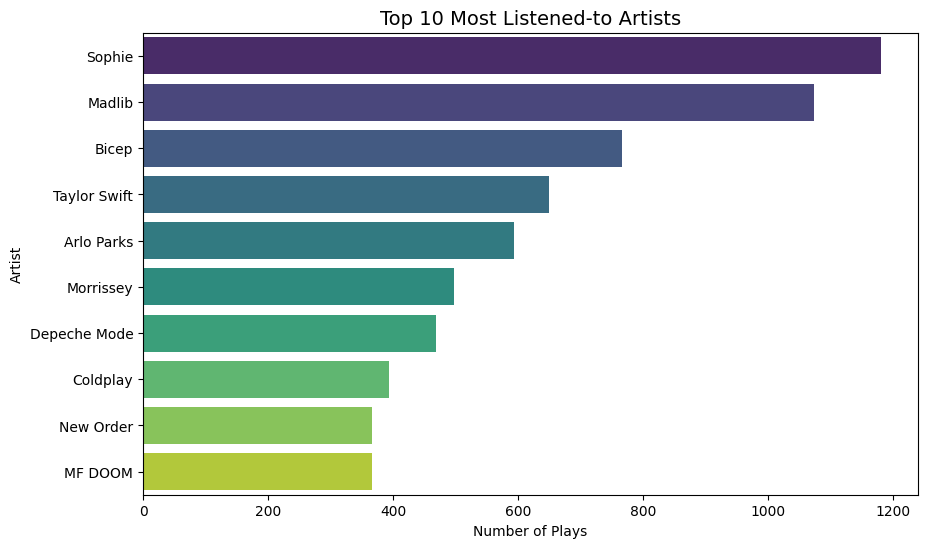

In [51]:

top_artists = df['Artist'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Most Listened-to Artists", fontsize=14)
plt.xlabel("Number of Plays")
plt.ylabel("Artist")
plt.show()

C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\672761051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.values, y=top_albums.index, palette='coolwarm')


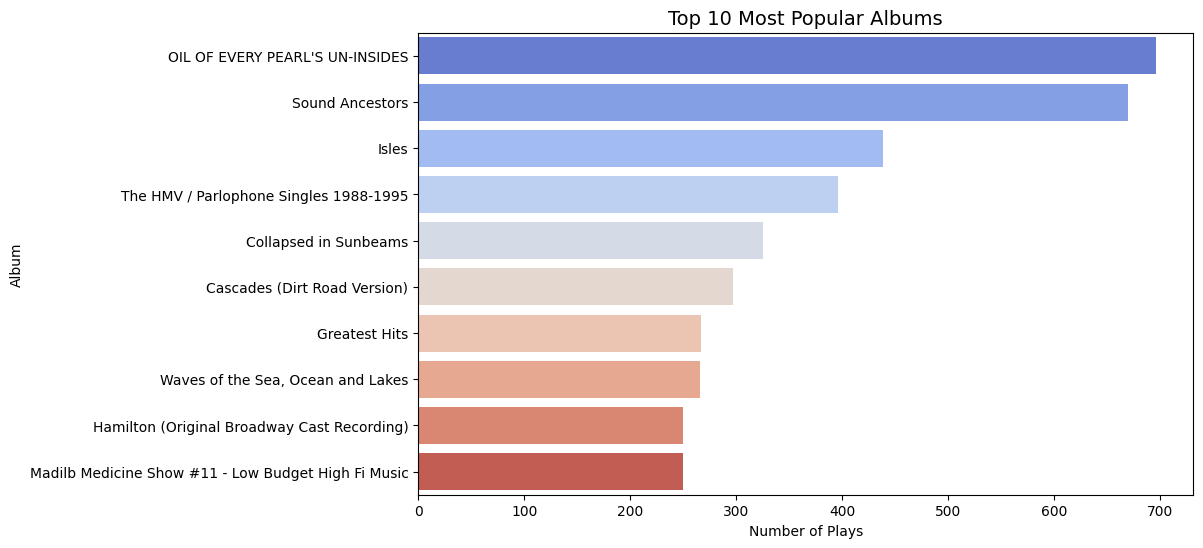

In [52]:
top_albums = df['Album'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_albums.values, y=top_albums.index, palette='coolwarm')
plt.title("Top 10 Most Popular Albums", fontsize=14)
plt.xlabel("Number of Plays")
plt.ylabel("Album")
plt.show()

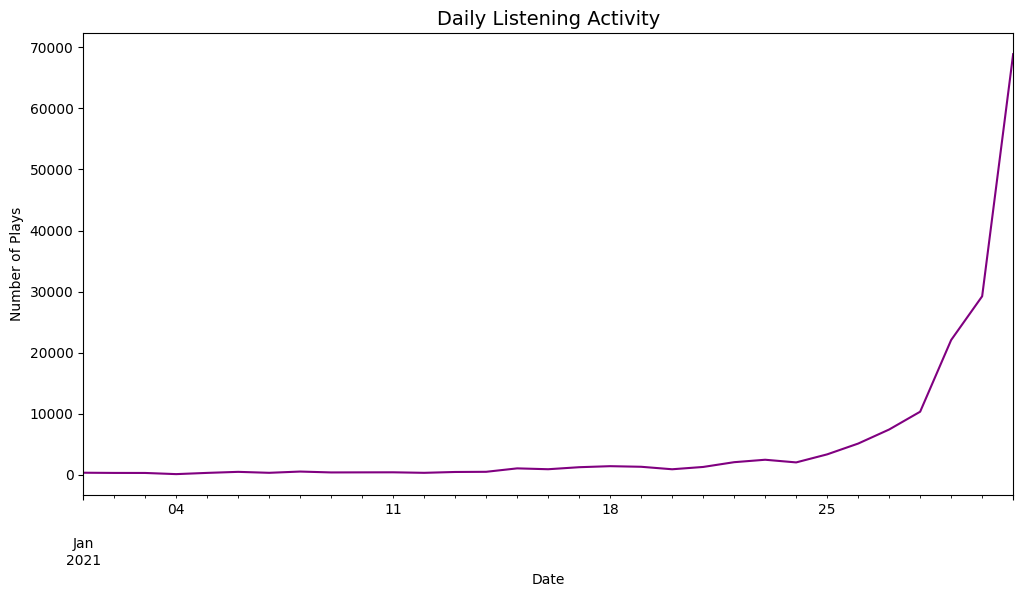

In [53]:

df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

daily_listens = df['Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_listens.plot(kind='line', color='purple')
plt.title("Daily Listening Activity", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Plays")
plt.show()

C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\869448102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='mako')


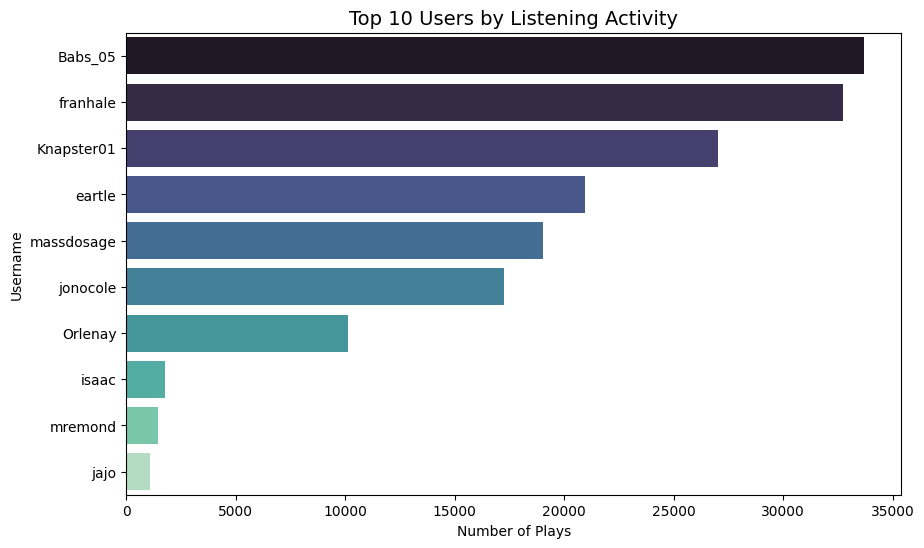

In [ ]:
top_users = df['Username'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='mako')
plt.title("Top 10 Users by Listening Activity", fontsize=14)
plt.xlabel("Number of Plays")
plt.ylabel("Username")
plt.show()

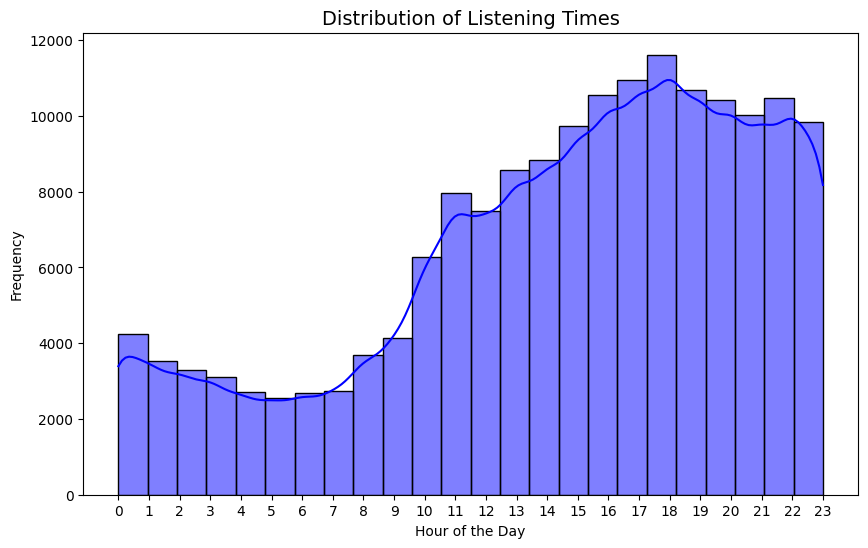

In [ ]:
df['Time'] = df['Time'].str.strip()

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=24, kde=True, color='blue')
plt.title("Distribution of Listening Times", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()


## Step 4: Perform Analysis Using Unsupervised Learning Models of Your Choice, Present Discussion, and Conclusions (70 points)


"Can we cluster users based on their listening activity patterns, such as the number of tracks played, unique artists, and albums? By analyzing these patterns, we aim to uncover distinct user segments, such as casual listeners and heavy users, to better understand audience behavior on music platforms."

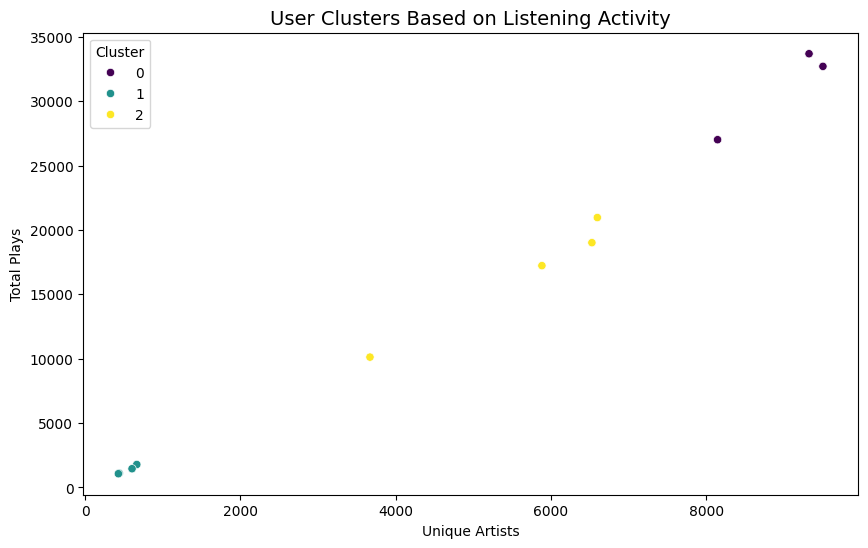

In [ ]:
user_activity = df.groupby('Username').agg(
    total_plays=('Track', 'count'),
    unique_artists=('Artist', 'nunique'),
    unique_albums=('Album', 'nunique')
).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_activity[['total_plays', 'unique_artists', 'unique_albums']])

kmeans = KMeans(n_clusters=3, random_state=42)
user_activity['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=user_activity['unique_artists'],
    y=user_activity['total_plays'],
    hue=user_activity['cluster'],
    palette='viridis'
)
plt.title("User Clusters Based on Listening Activity", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")
plt.legend(title="Cluster")
plt.show()

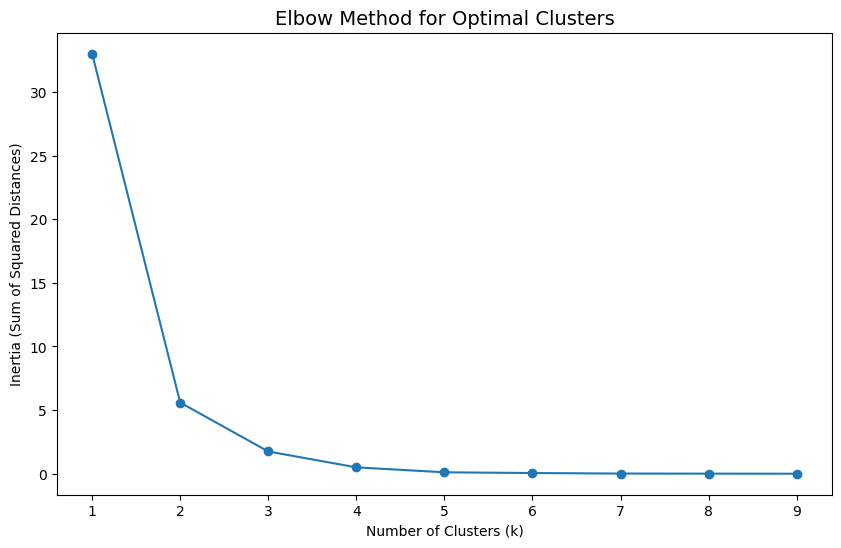

In [ ]:
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()


A clear drop-off from 1 to 2 indicates that two clusters capture the majority of variance in the data.

A slight drop from 2 to 3 means that adding a third cluster might provide some improvement but not significantly.

Beyond 3 clusters, the curve flattens, meaning additional clusters provide diminishing returns.

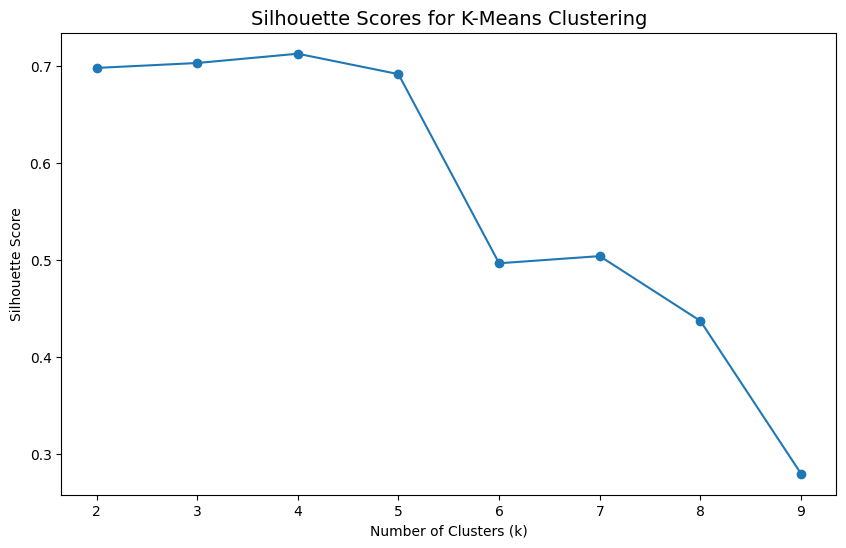

In [58]:
from sklearn.metrics import silhouette_score


silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))


plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means Clustering", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


A flat silhouette score between 2 and 4 clusters means that clusters 2, 3, or 4 perform similarly in terms of quality.

A drop beyond 5 clusters suggests over-clustering, where the model starts splitting coherent groups unnecessarily.

The small peak at 6-7 suggests these could be reasonable choices if the data contains subgroups.


Choose 2 or 3 clusters.

Rationale: Simplicity, clear segmentation of users.
Use Case: Broad segmentation, e.g., "casual listeners vs. heavy users."
More Detailed Segmentation:
Choose 6 clusters.

Rationale: Captures subtle subgroups in the data without over-complicating the segmentation.
Use Case: Detailed audience segmentation for more targeted insights.

n_clusters = 2, Silhouette Score = 0.631
n_clusters = 3, Silhouette Score = 0.625
n_clusters = 4, Silhouette Score = 0.529
n_clusters = 5, Silhouette Score = 0.481
n_clusters = 6, Silhouette Score = 0.411
n_clusters = 7, Silhouette Score = 0.250
n_clusters = 8, Silhouette Score = 0.196
n_clusters = 9, Silhouette Score = 0.131
n_clusters = 10, Silhouette Score = 0.073


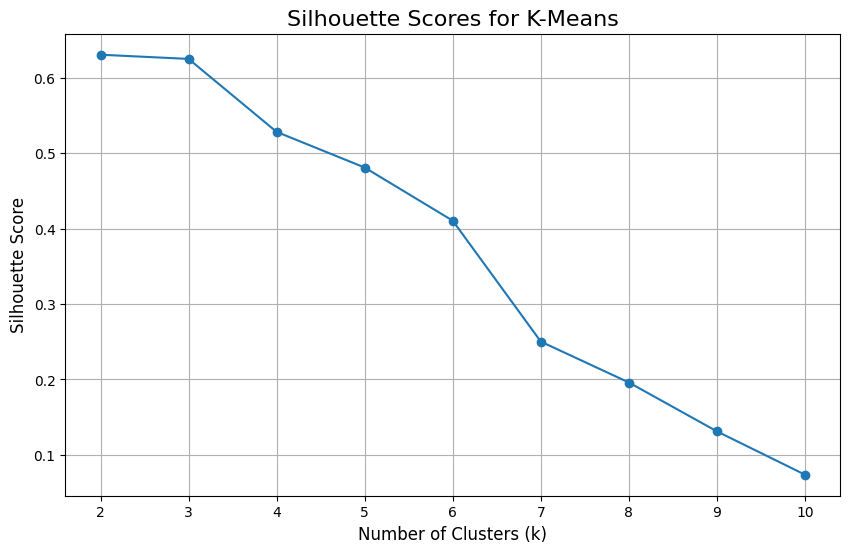

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


cluster_range = range(2, 11)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_updated_features)
    

    score = silhouette_score(scaled_updated_features, labels)
    silhouette_scores.append(score)
    print(f"n_clusters = {k}, Silhouette Score = {score:.3f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid()
plt.show()


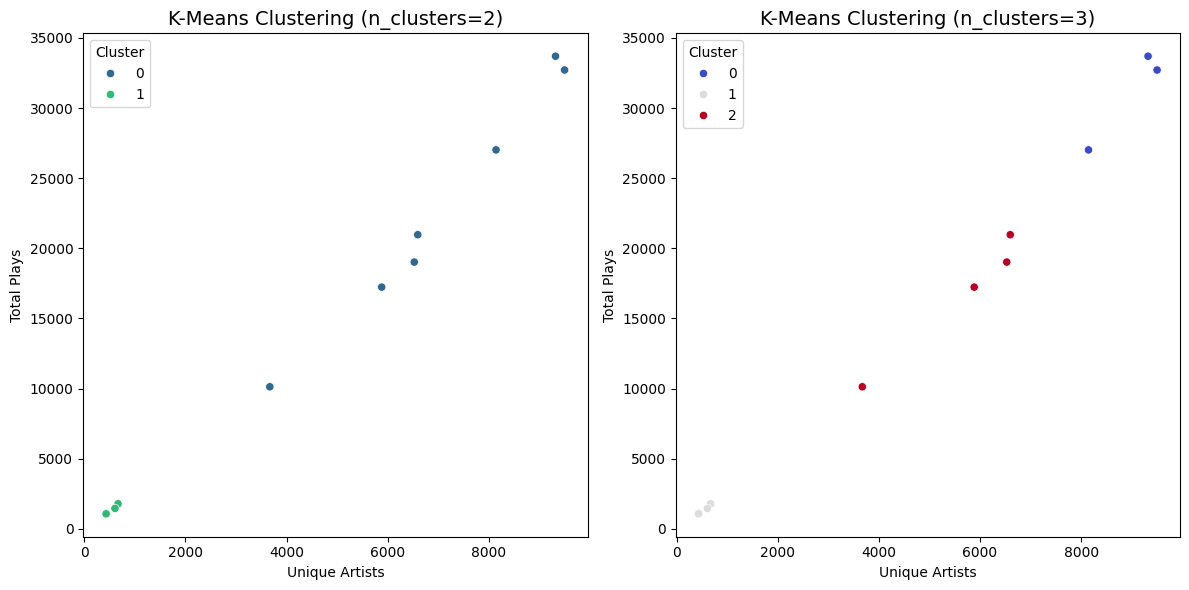

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_3 = KMeans(n_clusters=3, random_state=42)

user_activity['kmeans_2_cluster'] = kmeans_2.fit_predict(scaled_updated_features)
user_activity['kmeans_3_cluster'] = kmeans_3.fit_predict(scaled_updated_features)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=user_activity['unique_artists'], 
    y=user_activity['total_plays'], 
    hue=user_activity['kmeans_2_cluster'], 
    palette='viridis'
)
plt.title("K-Means Clustering (n_clusters=2)", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")
plt.legend(title="Cluster")


plt.subplot(1, 2, 2)
sns.scatterplot(
    x=user_activity['unique_artists'], 
    y=user_activity['total_plays'], 
    hue=user_activity['kmeans_3_cluster'], 
    palette='coolwarm'
)
plt.title("K-Means Clustering (n_clusters=3)", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
user_activity['cluster'] = kmeans.fit_predict(scaled_features)

cluster_summary = user_activity.groupby('cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
          total_plays  unique_artists  unique_albums  kmeans_2_cluster  \
cluster                                                                  
0        31140.666667         8992.00       13669.00               0.0   
1         1349.250000          533.75         646.00               1.0   
2        16833.500000         5669.75        7955.25               0.0   

         kmeans_3_cluster  
cluster                    
0                     0.0  
1                     1.0  
2                     2.0  


C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\3976535874.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = user_activity.groupby('cluster').mean()


Cluster Analysis

1. Cluster 0: High Activity Users
Total Plays: 31,140 (very high).
Unique Artists: 8,992 (high diversity).
Unique Albums: 13,669 (high diversity).
Interpretation:
These users are likely "Power Listeners", who listen to a large number of tracks across a diverse range of artists and albums.
They represent a small, highly engaged segment of the user base.
2. Cluster 1: Low Activity Users
Total Plays: 1,349 (low).
Unique Artists: 533 (moderate diversity for low plays).
Unique Albums: 646 (moderate diversity for low plays).
Interpretation:
These users are likely "Casual Listeners", who listen infrequently and explore a moderate number of artists and albums.
They may represent the largest segment of the user base.
3. Cluster 2: Moderate Activity Users
Total Plays: 16,833 (moderate).
Unique Artists: 5,669 (moderate diversity).
Unique Albums: 7,955 (moderate diversity).
Interpretation:
These users are likely "Eclectic Listeners", who exhibit moderately high activity and a good variety of listening preferences.
They may be a mix of loyal users with somewhat niche interests.

C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\282436420.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = user_activity.groupby('cluster').mean()


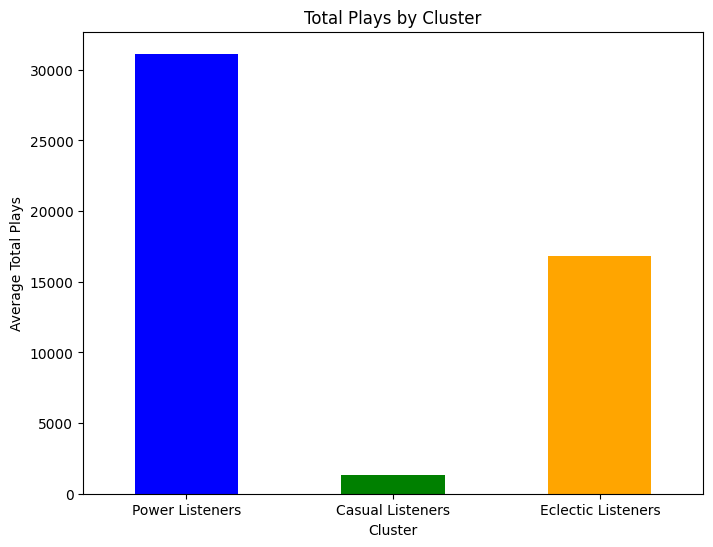

In [63]:

cluster_descriptions = {
    0: "Power Listeners",
    1: "Casual Listeners",
    2: "Eclectic Listeners"
}
user_activity['cluster_description'] = user_activity['cluster'].map(cluster_descriptions)
import matplotlib.pyplot as plt

cluster_summary = user_activity.groupby('cluster').mean()


plt.figure(figsize=(8, 6))
cluster_summary['total_plays'].plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title("Total Plays by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Total Plays")
plt.xticks([0, 1, 2], ['Power Listeners', 'Casual Listeners', 'Eclectic Listeners'], rotation=0)
plt.show()



### 1. Add Time of Day Feature

In [79]:

df['hour'] = df['Time']


def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time)


time_of_day_distribution = pd.crosstab(df['Username'], df['time_of_day'], normalize='index')


time_of_day_distribution.columns = ['Morning_ratio', 'Afternoon_ratio', 'Evening_ratio', 'Night_ratio']


user_activity = user_activity.merge(time_of_day_distribution, left_on='Username', right_index=True, how='left')


In [66]:
from sklearn.preprocessing import StandardScaler


updated_features = ['total_plays', 'unique_artists', 'unique_albums', 
                    'Morning_ratio', 'Afternoon_ratio', 'Evening_ratio', 'Night_ratio']


scaler = StandardScaler()
scaled_updated_features = scaler.fit_transform(user_activity[updated_features])

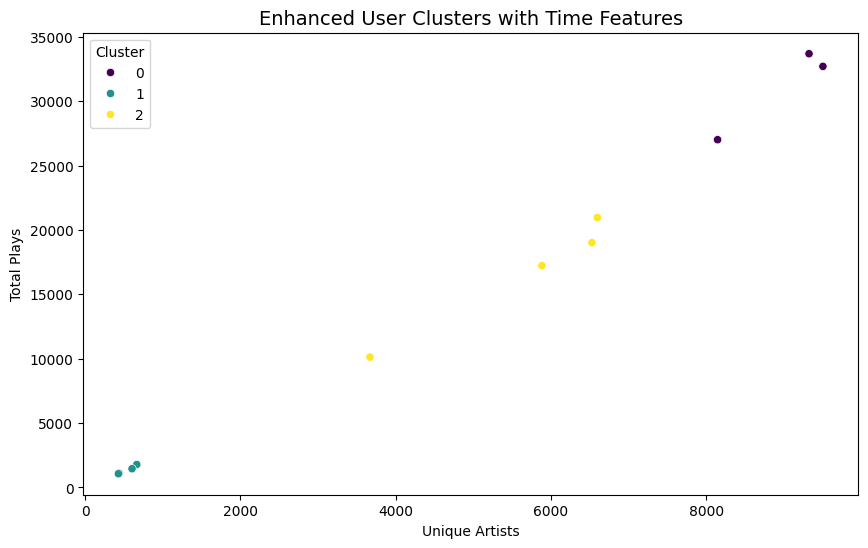

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
user_activity['enhanced_cluster'] = kmeans.fit_predict(scaled_updated_features)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=user_activity['unique_artists'],
    y=user_activity['total_plays'],
    hue=user_activity['enhanced_cluster'],
    palette='viridis'
)
plt.title("Enhanced User Clusters with Time Features", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")
plt.legend(title="Cluster")
plt.show()


In [68]:

enhanced_cluster_summary = user_activity.groupby('enhanced_cluster').mean()

print("Enhanced Cluster Summary:")
print(enhanced_cluster_summary)


Enhanced Cluster Summary:
                   total_plays  unique_artists  unique_albums  cluster  \
enhanced_cluster                                                         
0                 31140.666667         8992.00       13669.00      0.0   
1                  1349.250000          533.75         646.00      1.0   
2                 16833.500000         5669.75        7955.25      2.0   

                  kmeans_2_cluster  kmeans_3_cluster  Morning_ratio  \
enhanced_cluster                                                      
0                              0.0               0.0       0.258707   
1                              1.0               1.0       0.321647   
2                              0.0               2.0       0.286214   

                  Afternoon_ratio  Evening_ratio  Night_ratio  
enhanced_cluster                                               
0                        0.320921       0.182938     0.237434  
1                        0.261748       0.225145     0.

C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\2816606235.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  enhanced_cluster_summary = user_activity.groupby('enhanced_cluster').mean()


Cluster Interpretation
The enhanced_cluster_summary provides insights into user behavior across clusters, including listening activity and time-of-day preferences. Let’s analyze the key metrics for each cluster:

1. Cluster 0: Power Listeners
total_plays: 31,140 (very high).
unique_artists: 8,992 (high).
Morning_ratio: 25.9%, Afternoon_ratio: 32.1%, Evening_ratio: 18.3%, Night_ratio: 23.7%.
Interpretation:
These are power listeners with a very high total play count and diverse artist preferences.
They are slightly more active in the afternoon but maintain relatively balanced listening patterns throughout the day.
2. Cluster 1: Casual Listeners
total_plays: 1,349 (low).
unique_artists: 533 (low to moderate).
Morning_ratio: 32.2%, Afternoon_ratio: 26.2%, Evening_ratio: 22.5%, Night_ratio: 19.1%.
Interpretation:
These are casual listeners with low overall activity and fewer unique artists.
They are slightly more active in the morning but less engaged overall during the evening and night.
3. Cluster 2: Eclectic Listeners
total_plays: 16,833 (moderate to high).
unique_artists: 5,670 (moderate to high).
Morning_ratio: 28.6%, Afternoon_ratio: 33.0%, Evening_ratio: 17.4%, Night_ratio: 20.9%.
Interpretation:
These are eclectic listeners with moderate activity but a strong diversity in their artist preferences.
They show a strong preference for listening in the afternoon compared to other times of day.

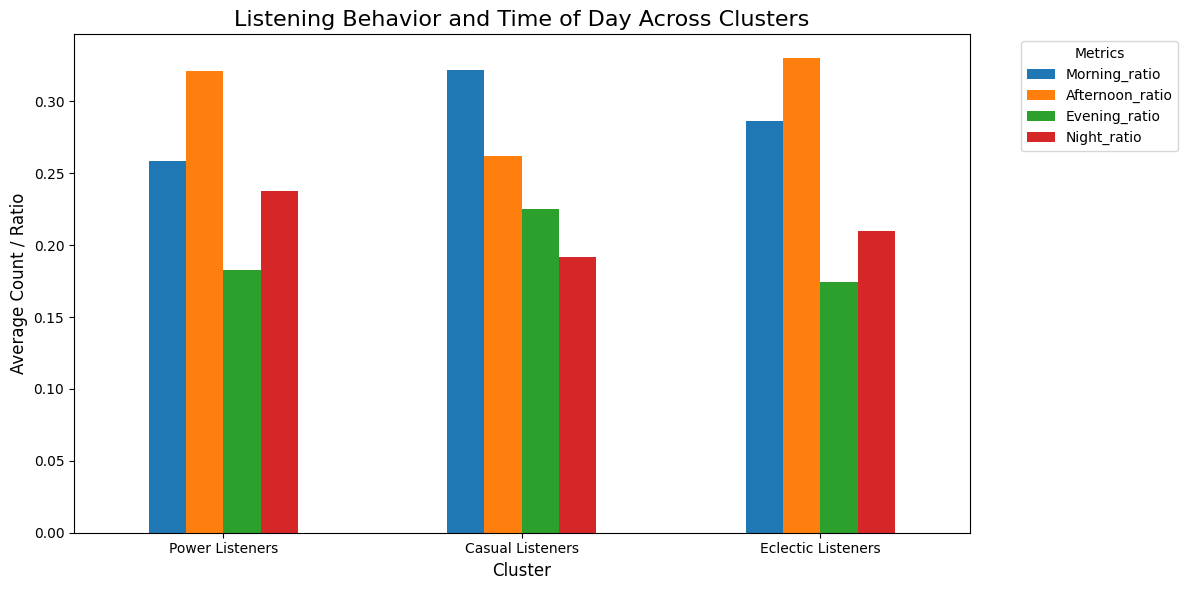

In [ ]:

cluster_names = {
    0: "Power Listeners",
    1: "Casual Listeners",
    2: "Eclectic Listeners"
}

enhanced_cluster_summary = enhanced_cluster_summary.rename(index=cluster_names)

enhanced_cluster_summary[[
                          'Morning_ratio', 'Afternoon_ratio', 'Evening_ratio', 'Night_ratio']].plot(
    kind='bar', figsize=(12, 6)
)

plt.title("Listening Behavior and Time of Day Across Clusters", fontsize=16)
plt.ylabel("Average Count / Ratio", fontsize=12)
plt.xlabel("Cluster", fontsize=12)
plt.xticks(rotation=0)

plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Compare with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=1.5, min_samples=5)
user_activity['dbscan_cluster'] = dbscan.fit_predict(scaled_updated_features)


print("DBSCAN Clusters:")
print(user_activity['dbscan_cluster'].value_counts())


dbscan_summary = user_activity.groupby('dbscan_cluster').mean()
print("\nDBSCAN Cluster Summary:")
print(dbscan_summary)


DBSCAN Clusters:
-1    11
Name: dbscan_cluster, dtype: int64

DBSCAN Cluster Summary:
                 total_plays  unique_artists  unique_albums   cluster  \
dbscan_cluster                                                          
-1              15104.818182     4708.181818    6855.636364  1.090909   

                kmeans_2_cluster  kmeans_3_cluster  Morning_ratio  \
dbscan_cluster                                                      
-1                      0.363636          1.090909       0.291597   

                Afternoon_ratio  Evening_ratio  Night_ratio  enhanced_cluster  
dbscan_cluster                                                                 
-1                     0.302739       0.195111     0.210554          1.090909  


C:\Users\dusti\AppData\Local\Temp\ipykernel_34596\1803895520.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dbscan_summary = user_activity.groupby('dbscan_cluster').mean()


In [71]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=3)
user_activity['dbscan_cluster'] = dbscan.fit_predict(scaled_updated_features)

# Check new cluster assignments
print(user_activity['dbscan_cluster'].value_counts())

0    7
1    4
Name: dbscan_cluster, dtype: int64


In [72]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

best_eps = None
best_min_samples = None
best_silhouette = -1


eps_values = np.linspace(0.5, 5.0, 10)
min_samples_values = range(2, 10)


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_updated_features)
        
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(scaled_updated_features, labels)
        if silhouette > best_silhouette:
            best_eps = eps
            best_min_samples = min_samples
            best_silhouette = silhouette

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette:.3f}")


Best eps: 2.0, Best min_samples: 2, Best Silhouette Score: 0.631


In [73]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
user_activity['dbscan_cluster'] = dbscan.fit_predict(scaled_updated_features)


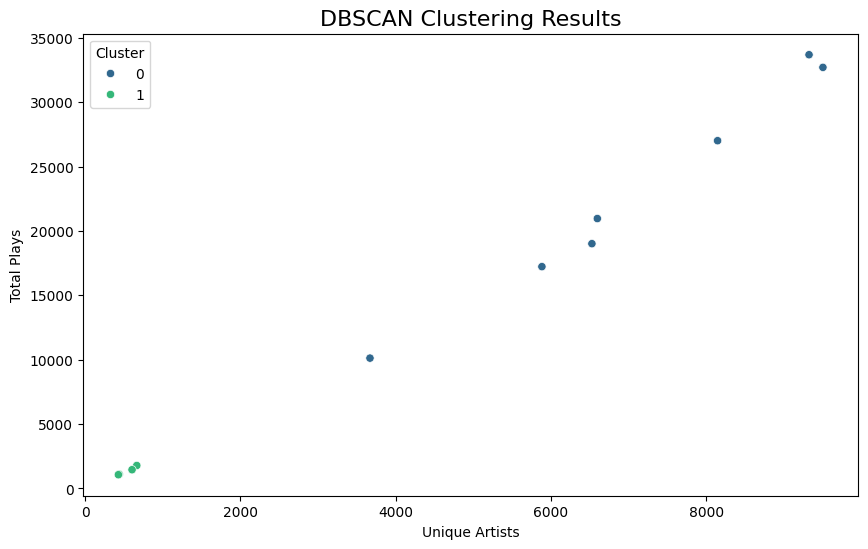

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=user_activity['unique_artists'], 
    y=user_activity['total_plays'],
    hue=user_activity['dbscan_cluster'], 
    palette='viridis'
)
plt.title("DBSCAN Clustering Results", fontsize=16)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")
plt.legend(title="Cluster")
plt.show()


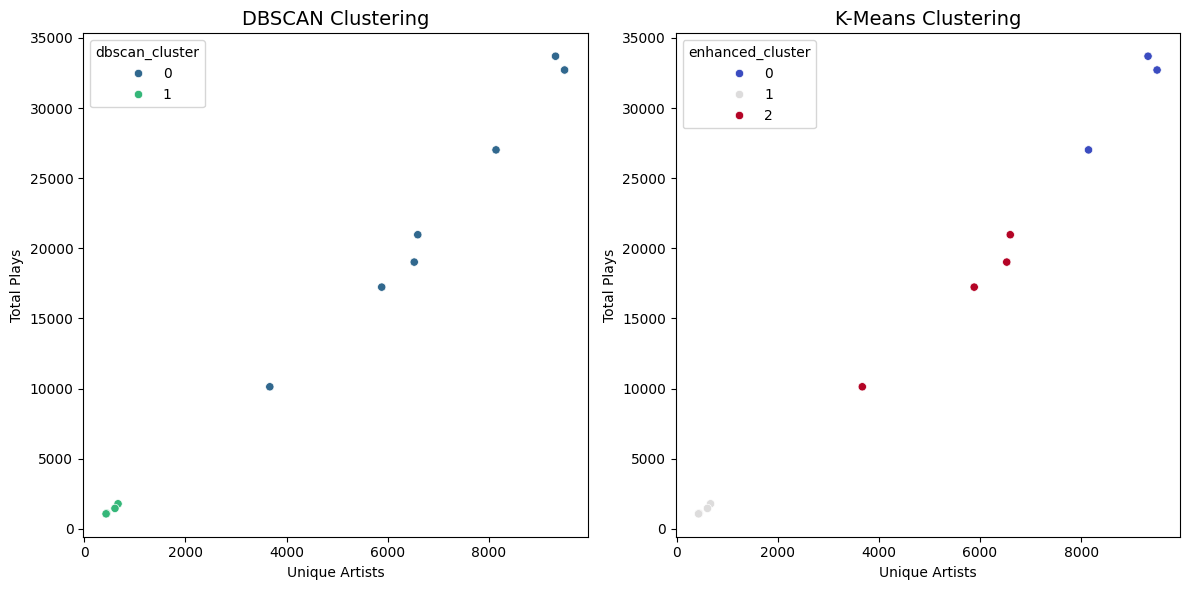

In [75]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(
    x=user_activity['unique_artists'], 
    y=user_activity['total_plays'],
    hue=user_activity['dbscan_cluster'], 
    palette='viridis'
)
plt.title("DBSCAN Clustering", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")


plt.subplot(1, 2, 2)
sns.scatterplot(
    x=user_activity['unique_artists'], 
    y=user_activity['total_plays'],
    hue=user_activity['enhanced_cluster'], 
    palette='coolwarm'
)
plt.title("K-Means Clustering", fontsize=14)
plt.xlabel("Unique Artists")
plt.ylabel("Total Plays")

plt.tight_layout()
plt.show()


In [76]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(scaled_updated_features, user_activity['enhanced_cluster'])
dbscan_score = silhouette_score(scaled_updated_features, user_activity['dbscan_cluster'])

print(f"Silhouette Score (K-Means): {kmeans_score:.3f}")
print(f"Silhouette Score (DBSCAN): {dbscan_score:.3f}")


Silhouette Score (K-Means): 0.625
Silhouette Score (DBSCAN): 0.631


The silhouette scores for K-Means (0.625) and DBSCAN (0.631) are very close, with DBSCAN performing slightly better. 

Silhouette Score Range:
Values closer to 1 indicate well-defined, cohesive clusters.
Scores around 0.6 are generally considered good for real-world datasets.
DBSCAN (0.631) slightly edges out K-Means (0.625)


### K-Means:
Strengths:

Suitable for spherical, evenly distributed clusters.

Fast and scalable for large datasets.

Best Use Case:

Expecting well-separated, compact clusters without much noise.

### DBSCAN:
Strengths:
Handles noise and outliers effectively (points labeled -1).

Detects clusters of arbitrary shapes.

Best Use Case:

Data with varying densities or contains meaningful noise points.

## 5. Recommendation
Given the slightly higher silhouette score for DBSCAN:

DBSCAN:The noise points (-1) represent meaningful outliers in the data.Data contains non-spherical clusters.

K-Means:Simplicity and interpretability. Don’t need to identify noise or handle non-spherical clusters.
